In [33]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import math
import re
os.chdir("../")
os.chdir("FinalDataset")

In [41]:
data = pd.read_csv("feature_data.csv", index_col=False,low_memory=False)
data.drop(columns='Unnamed: 0',inplace=True)
data.drop(columns='ext',inplace=True)

In [42]:
data.replace('Benign_list_big_final',"Benign",inplace=True)
data.replace('DefacementSitesURLFiltered',"Defacement",inplace=True)
data.replace('Malware_dataset',"Malware",inplace=True)
data.replace('phishing_dataset',"Phishing",inplace=True)
data.replace('spam_dataset',"Spam",inplace=True)

In [43]:
data.head()

,File,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,has_ip,numDigits,...,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlIsLive,urlLength
0,Spam,31,0.064516,0,0,-4.708307,True,False,0,27,...,0,0,0,0,0.000000,0,2,0.000000,False,81
1,Spam,64790,0.306050,0,0,-4.576882,True,False,0,12,...,0,19,0,0,0.923800,59853,19829,3.018458,False,58
2,Spam,757,0.195509,0,0,-4.205536,True,False,0,0,...,0,1,0,0,0.000000,0,148,0.000000,False,46
3,Spam,266310,0.230915,0,0,-4.550931,True,False,0,13,...,0,648,0,0,0.312647,83261,61495,1.353947,False,52
4,Spam,40,0.200000,0,0,-4.689336,True,False,0,14,...,2,1,0,0,0.000000,0,8,0.000000,False,83


In [44]:
grouped_df = data.groupby("File")
mean_df = grouped_df.mean()

In [45]:
mean_df.head()

,bodyLength,bscr,entropy,hasHttp,hasHttps,has_ip,numDigits,numImages,numLinks,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlIsLive,urlLength
File,,,,,,,,,,,,,,,,,,,
Benign,50059.051273,0.215643,-4.479222,0.946727,0.053818,0.0,14.677364,15.426000,100.891818,0.471364,11.824182,0.028727,0.005182,0.466055,32989.182273,11751.150727,3.977061,0.0,114.259636
Defacement,7128.453655,0.120285,-4.457697,1.000000,0.000000,0.0,4.574643,4.498250,17.878312,1.711029,2.789221,0.000000,0.000000,0.165609,2394.568443,1691.878612,0.658949,0.0,86.417958
Malware,2926.801211,0.080709,-4.269339,0.974751,0.007350,0.0,16.076697,0.555556,5.749503,0.723649,0.358582,0.038911,0.001124,0.142642,1078.286987,738.763511,0.570084,0.0,83.707652
Phishing,3729.060411,0.102345,-4.474045,0.983241,0.032112,0.0,8.868741,1.468941,7.517511,0.222679,1.227797,0.024385,0.003011,0.163015,1650.983843,941.686402,0.614699,0.0,84.313999
Spam,12221.293250,0.099236,-4.748068,1.000000,0.000000,0.0,21.736667,1.123500,39.223250,1.223167,9.135583,0.174583,0.001750,0.176403,8966.440333,3458.677833,0.612630,0.0,126.761917


In [46]:
objects = [i for i in data.columns if 'object' in str(data.dtypes[i])]
booleans = [i for i in data.columns if 'bool' in str(data.dtypes[i])]
ints = [i for i in data.columns if 'int' in str(data.dtypes[i]) or 'float' in str(data.dtypes[i])]

<AxesSubplot:>

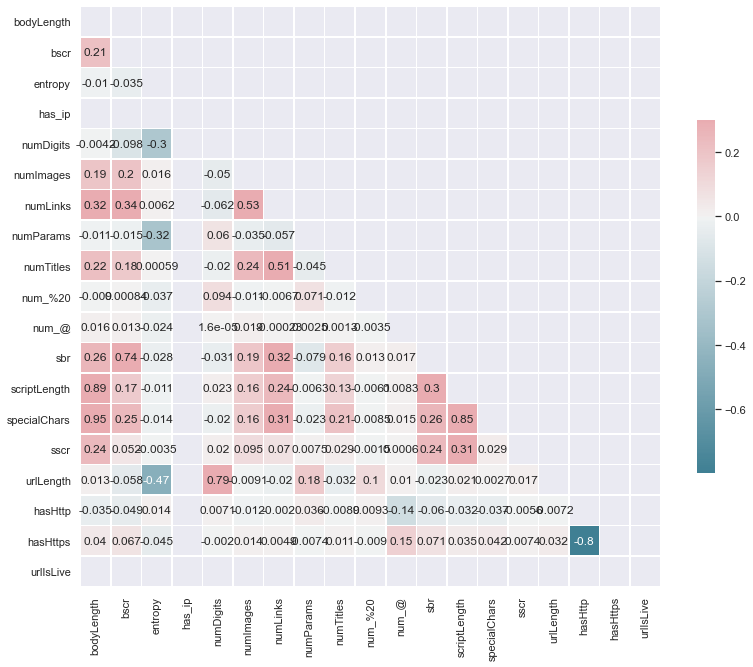

In [47]:
corr = data[ints+booleans].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(13, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)